In [1]:
import torch
import torch.optim as optim
from model import DQN
from wrappers import make_atari_env
from replay_memory import ReplayBuffer
from utils import train, test
from Param import *

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
env_id = "BoxingNoFrameskip-v4"
env = make_atari_env(env_id)

In [5]:
model = DQN(env.observation_space.shape, env.action_space.n).to(device)    
optimizer = optim.Adam(model.parameters(), lr=0.00001)
replay_buffer = ReplayBuffer(MEMORY_SIZE)

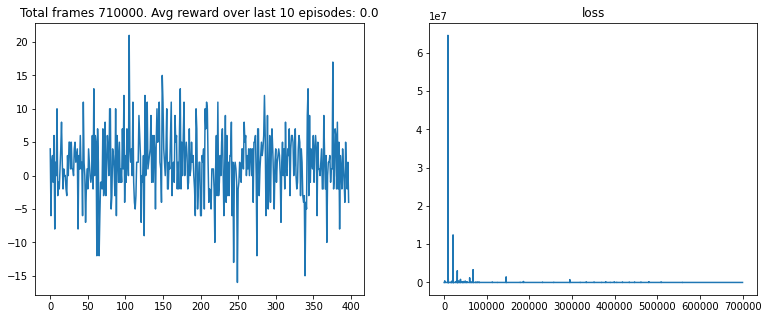

In [6]:
train(env, model, optimizer, replay_buffer, device)

In [7]:
import os
path = os.path.join(MODEL_SAVE_PATH, f"{env.spec.id}_episode_{400}.pth")
torch.save(model.state_dict(), path)

In [10]:
model.eval()
episodes = 5
render=True
for episode in range(episodes):
    state = env.reset()
    episode_reward = 0.0
    while True:
        action = model.act(state, 0, device)
        next_state, reward, done, _ = env.step(action)

        if render:
            env.render()
            time.sleep(0.02)

        episode_reward += reward
        state = next_state

        if done:
            print(f"Finished Episode {episode+1} with reward {episode_reward}")
            break

DependencyNotInstalled: Found neither the ffmpeg nor avconv executables. On OS X, you can install ffmpeg via `brew install ffmpeg`. On most Ubuntu variants, `sudo apt-get install ffmpeg` should do it. On Ubuntu 14.04, however, you'll need to install avconv with `sudo apt-get install libav-tools`.